# Import Packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_1samp
from scipy.stats import t
import function_helper as fh

# Load Data

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("MAXDD.csv")
df.head(3)

,Date,Ticker,Close,Combine Price,Dollar Volume,Return,Max DD,1W,1M,3M,6M,SPY 1W,SPY 1M,SPY 3M,SPY 6M,SPY Close,SPY Return,Rf,Beta,1W Rank,1M Rank,3M Rank,6M Rank,1W + 1M Rank,1W + 3M Rank,1W + 6M Rank,1M + 3M Rank,1M + 6M Rank,3M + 6M Rank,1W + 1M + 3M Rank,1W + 1M + 6M Rank,1W + 3M + 6M Rank,1M + 3M + 6M Rank,Total Rank
0,2018-03-01,FLS,41.200001,41.596667,70065425.85,-0.027155,0.133250,-0.054612,-0.091911,0.001946,0.057223,0.005925,-0.052097,0.043884,0.109455,267.700012,-0.014541,0.000081,0.939601,10,7,6,6,8.5,8.0,8.0,6.5,6.5,6.0,7.666667,7.666667,7.333333,6.333333,-0.021839
1,2018-03-02,FLS,42.290001,41.843333,77125631.25,0.026456,0.136591,-0.044510,-0.064587,0.018791,0.076629,-0.009985,-0.059646,0.018374,0.088167,269.079987,0.005155,0.000082,0.950065,9,6,5,6,7.5,7.0,7.5,5.5,6.0,5.5,6.666667,7.000000,6.666667,5.666667,-0.003419
2,2018-03-05,FLS,43.439999,43.079999,86103994.58,0.027193,0.145990,-0.032947,-0.041483,0.020197,0.098634,-0.020494,-0.045003,0.024247,0.087236,272.190002,0.011558,0.000082,0.962098,8,6,5,5,7.0,6.5,6.5,5.5,5.5,5.0,6.333333,6.333333,6.000000,5.333333,0.011100


In [4]:
#Seed = 11  

Long = {}; Short = {}; Long_Weight = {}; Short_Weight = {}  

Long[0] =  ['AAP', 'AES', 'BSX', 'CMG', 'CRM', 'HCA', 'INTU', 'ISRG', 'LLY', 'MRK', 'Total']   
Long_Weight[0] =  [0.20915483697196402, 0.16963954863390796, 0.13084354001759202, 0.04887712792562681, 0.04160638169268546, 0.12120182609391082, 0.07200377549981465, 0.038139734157200976, 0.07025594965083065, 0.12835913505325092, 1.0300818556967843]   
Short[0] =  ['AAL', 'AMG', 'COTY', 'FBHS', 'GE', 'GT', 'IVZ', 'KHC', 'MAC', 'MHK', 'Total']   
Short_Weight[0] =  [0.05756588057368857, 0.14975383344464457, 0.04776944037373551, 0.0961994911961861, 0.01735543806612125, 0.07405229049393457, 0.085309504591172, 0.04853095215032762, 0.41878125239857766, 0.00468191671161234, 1.0000000000000002]   

Long[1] =  ['AMD', 'AMT', 'AZO', 'BLL', 'CDNS', 'CHD', 'CMG', 'IQV', 'MKC', 'ORLY', 'Total']   
Long_Weight[1] =  [0.015701678215921895, 0.1542415714727091, 0.23124867729769208, 0.3337539089611788, 0.023652185886293024, 0.09231440593105518, 0.04773750059585585, 0.22343588924694976, 0.040371553896532415, 0.0033884773798077885, 1.1658458488839958]   
Short[1] =  ['AMG', 'GPS', 'GT', 'KHC', 'MAC', 'MYL', 'NOV', 'OXY', 'SLB', 'STT', 'Total']   
Short_Weight[1] =  [0.1476559566953507, 0.04512480909150395, 0.02994517310471283, 0.00304939269157803, 0.3378685722835928, 0.04931032079827504, 0.039977776884241645, 0.32614521889205217, 0.0003347312094856198, 0.02058804834920708, 0.9999999999999999]   

Long[2] =  ['AMT', 'APD', 'AWK', 'AZO', 'BLL', 'CDNS', 'CINF', 'CMG', 'EW', 'HSY', 'Total']   
Long_Weight[2] =  [0.14948779573486637, 0.3217862940927301, 0.19221019709208642, 0.08410003766215811, 0.005807948519199524, 0.2153860401842371, 0.08457474206985852, 0.106715481289503, 0.1631890969558915, 0.10030780721336305, 1.4235654408138938]   
Short[2] =  ['ADS', 'AMG', 'DXC', 'KHC', 'M', 'MAC', 'MYL', 'NKTR', 'NOV', 'OXY', 'Total']   
Short_Weight[2] =  [0.25929597971736806, 0.11240499431135269, 0.07233622478405362, 0.024132684595777013, 0.014308883534042248, 0.19254071723288743, 0.08348773554689388, 0.0018881177408814692, 0.05448466001315406, 0.18512000252358954, 1.0]   

Long[3] =  ['AMAT', 'AMD', 'ANSS', 'BLL', 'CHTR', 'CMG', 'EW', 'GPN', 'KLAC', 'LRCX', 'Total']   
Long_Weight[3] =  [0.09519562951284234, 0.16563208997500387, 0.015151828415973748, 0.009149362975762614, 0.2202622022712775, 0.23343128610292585, 0.03374189733133839, 0.17943157075594068, 0.009967155458961171, 0.03803697719997395, 1.0000000000000002]   
Short[3] =  ['ADS', 'AMG', 'APA', 'CXO', 'EOG', 'EQT', 'GPS', 'LB', 'M', 'MAC', 'Total']   
Short_Weight[3] =  [0.2900992286995963, 0.381309749665953, 0.05795207682460002, 0.0005715938404887548, 0.09467621806419271, 0.03492303554846292, 0.0050150536026679245, 0.015142197988813014, 0.030115370538152945, 0.3149255242993193, 1.2247300490722468]   

In [5]:
Tickers = list(set(df['Ticker'].values))
Train_Dates = ['2018-04-02', '2018-07-02', '2018-10-01', '2019-01-02'] # Train[i] - Test[i] -> ith Data
Test_Dates = ['2019-03-29', '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31'] # Test[i+1] - Test[i] -> ith BackTest Period


Ranks = ['1W Rank', '1M Rank', '3M Rank', '6M Rank', 
           '1W + 1M Rank', '1W + 3M Rank', '1W + 6M Rank', '1M + 3M Rank', '1M + 6M Rank', '3M + 6M Rank',
           '1W + 1M + 3M Rank', '1W + 1M + 6M Rank', '1W + 3M + 6M Rank', '1M + 3M + 6M Rank',
           'Total Rank']

# Show Positions

In [6]:
D = {}
Capital = 1e8

for i in range(4):
    Portfolio_Info = fh.Get_Portfolio(Long, Short, Long_Weight, Short_Weight, i)
    D[i] = fh.Factor_Tester(df, Ranks, Capital, Portfolio_Info)
    D[i].Construct_DF(Tickers, Train_Dates[i], Test_Dates[i], Test_Dates[i+1])
    D[i].Select_Stock_List(N = 15)
    D[i].Determine_Stock(N = 10)
    D[i].Cal_Return()
    print("No." + str(i+1) + " Portfolio:")
    print("Start Position:", Capital)
    print("Leverage:", D[i].Portfolio_Info['Long Weight'].values[-1] + D[i].Portfolio_Info['Short Weight'].values[-1])
    print("Loan:", (D[i].Portfolio_Info['Long Weight'].values[-1] + D[i].Portfolio_Info['Short Weight'].values[-1] - 1) * Capital)
    Capital = D[i].Final_Wealth
    print(D[i].Portfolio_Info)
    print()

No.1 Portfolio:
Start Position: 100000000.0
Leverage: 2.0300818556967846
Loan: 103008185.56967846
     Long  Long Weight  Short  Short Weight
0     AAP     0.209155    AAL      0.057566
1     AES     0.169640    AMG      0.149754
2     BSX     0.130844   COTY      0.047769
3     CMG     0.048877   FBHS      0.096199
4     CRM     0.041606     GE      0.017355
5     HCA     0.121202     GT      0.074052
6    INTU     0.072004    IVZ      0.085310
7    ISRG     0.038140    KHC      0.048531
8     LLY     0.070256    MAC      0.418781
9     MRK     0.128359    MHK      0.004682
10  Total     1.030082  Total      1.000000

No.2 Portfolio:
Start Position: 108302342.08135988
Leverage: 2.1658458488839956
Loan: 126263835.93996789
     Long  Long Weight  Short  Short Weight
0     AMD     0.015702    AMG      0.147656
1     AMT     0.154242    GPS      0.045125
2     AZO     0.231249     GT      0.029945
3     BLL     0.333754    KHC      0.003049
4    CDNS     0.023652    MAC      0.337869
5   

# Show PnL Table

In [7]:
PnL = fh.Process_PnL(D)
PnL

,Daily SPY,Daily PnL,SPY Level,Cumulative PnL,Net Value Level,Daily Return
Date,,,,,,
2019-04-01,0.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000
2019-04-02,0.000490,-1.410994e+05,1.000490,-1.410994e+05,0.998589,-0.001411
2019-04-03,0.001574,-3.854638e+05,1.002064,-5.265632e+05,0.994734,-0.003860
2019-04-04,0.002653,-6.751767e+05,1.004723,-1.201740e+06,0.987983,-0.006788
2019-04-05,0.004840,-2.669063e+05,1.009586,-1.468646e+06,0.985314,-0.002702
...,...,...,...,...,...,...
2020-03-25,0.014970,-1.313104e+06,0.866032,8.191170e+07,1.819117,-0.007167
2020-03-26,0.058390,2.751006e+06,0.916599,8.466271e+07,1.846627,0.015123
2020-03-27,-0.029786,-6.741471e+05,0.889298,8.398856e+07,1.839886,-0.003651


# Plot Time Series

D:\Anaconda\Setup\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


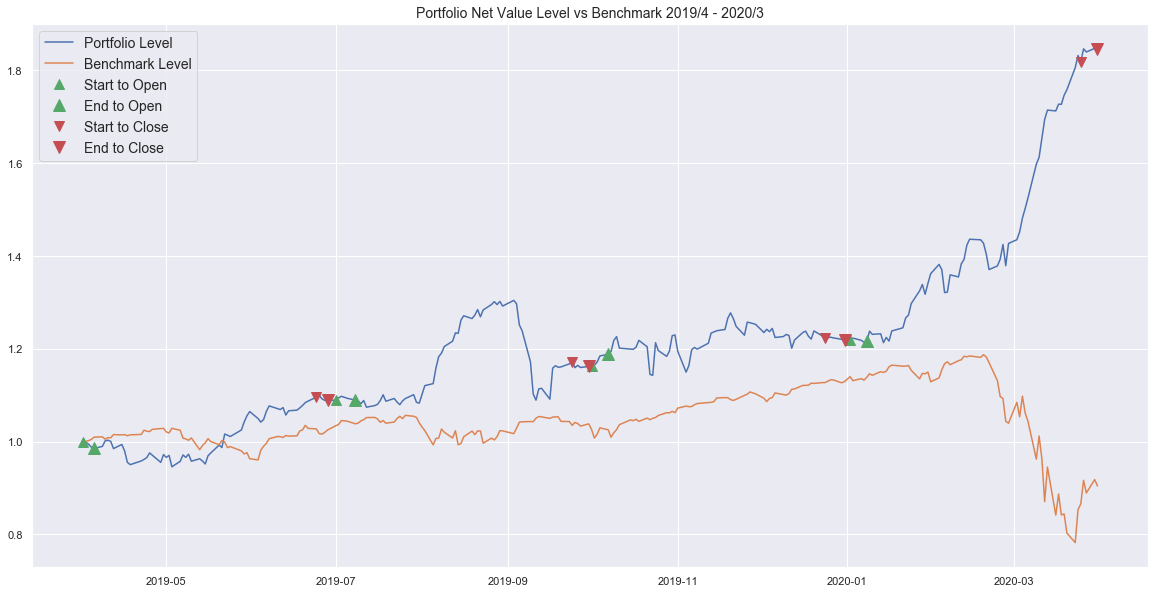

In [8]:
fh.Plot_Return(PnL)

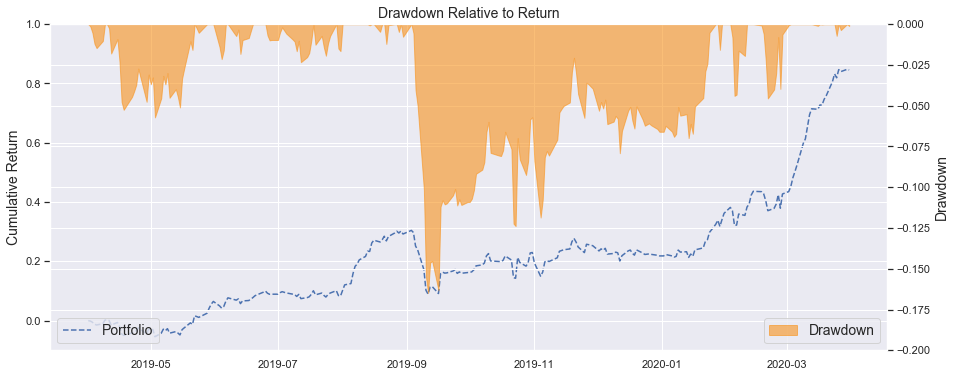

In [9]:
fh.Plot_Drawdown(PnL)

# Summary Statistics

In [10]:
fh.Summarize(PnL, freq = 'd', Capital = 1e8, Rf = 0.024192)

Initial Capital:  100000000.0
Final Wealth:  184546499.33328718
--------------------------------------------
Summary Statistics (Return):
count    251.000000
mean       0.002556
std        0.014951
min       -0.059471
25%       -0.004736
50%        0.003566
75%        0.010430
max        0.061538
Name: Daily Return, dtype: float64
--------------------------------------------
Summary Statistics (PnL):
count    2.510000e+02
mean     3.368386e+05
std      1.858469e+06
min     -6.970522e+06
25%     -5.163229e+05
50%      3.433503e+05
75%      1.248921e+06
max      7.264579e+06
Name: Daily PnL, dtype: float64
--------------------------------------------
Summary Statistics (Annualized Return):
Mean:  0.643997434524165
Vol: 0.23686817218311884
t-statistics:  2.718801046965066 ;  p-value:  0.007010848958879481
--------------------------------------------
Alpha: 0.82
--------------------------------------------
Information Ratio: 1.79
--------------------------------------------
Top1 Draw Down:

# Bar Graphs

## Top1 DD

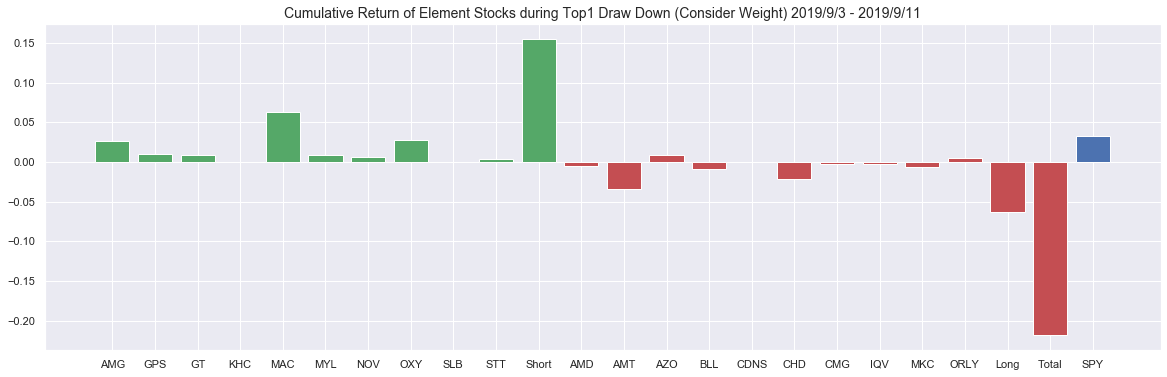

In [11]:
df = D[1].BT_df.copy()
df = df[(df.Date >= '2019-09-03') & (df.Date <= '2019-09-11')]
df = df.set_index('Date')

plt.figure(figsize=(20,6))
plt.title("Cumulative Return of Element Stocks during Top1 Draw Down (Consider Weight) 2019/9/3 - 2019/9/11",
         fontdict={'size': 14})

# Short
r_total = df[df.Ticker == Short[1][0]]['Return'].copy() * Short_Weight[1][0]
r_total[0] = 0.0
for i in range(10):
    r = df[df.Ticker == Short[1][i]]['Return'].copy()
    r[0] = 0.0
    r_cum = (r+1.0).cumprod() - 1.0
    Weight = Short_Weight[1][i]
    plt.bar(Short[1][i], height=r_cum[-1] * Weight, color = 'g')
    if i >= 1: 
        r_total += r * Weight
r_total = (r_total+1.0).cumprod() - 1.0
plt.bar('Short', height=r_total[-1], color = 'g')

# Long
r_total1 = df[df.Ticker == Long[1][0]]['Return'].copy() * Long_Weight[1][0]
r_total1[0] = 0.0
for i in range(10):
    r = df[df.Ticker == Long[1][i]]['Return'].copy()
    r[0] = 0.0
    r_cum = (r+1.0).cumprod() - 1.0
    Weight = Long_Weight[2][i]
    plt.bar(Long[1][i], height=r_cum[-1] * Weight, color = 'r')
    if i >= 1: 
        r_total1 += r * Weight
r_total1 = (r_total1+1.0).cumprod() - 1.0
plt.bar('Long', height=r_total1[-1], color = 'r')

# SPY
spy = df[df.Ticker == Long[1][i]]['SPY Return'].copy()
spy[0] = 0.0
spy = (spy+1.0).cumprod() - 1.0

total = (r_total1 * Long_Weight[2][-1] - r_total * Short_Weight[2][-1]) / (Long_Weight[2][-1] + Short_Weight[2][-1])
plt.bar('Total', height=r_total1[-1] - r_total[-1], color = 'r')
plt.bar('SPY', height=spy[-1], color = 'b')
plt.show()

## Top2 DD

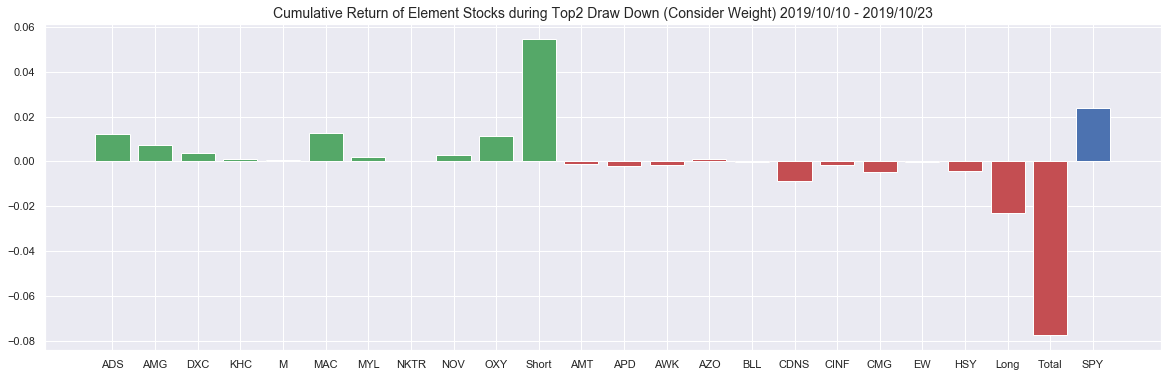

In [12]:
df = D[2].BT_df.copy()
df = df[(df.Date >= '2019-10-10') & (df.Date <= '2019-10-23')]
df = df.set_index('Date')

plt.figure(figsize=(20,6))
plt.title("Cumulative Return of Element Stocks during Top2 Draw Down (Consider Weight) 2019/10/10 - 2019/10/23",
         fontdict={'size': 14})

# Short
r_total = df[df.Ticker == Short[2][0]]['Return'].copy() * Short_Weight[2][0]
r_total[0] = 0.0
for i in range(10):
    r = df[df.Ticker == Short[2][i]]['Return'].copy()
    r[0] = 0.0
    r_cum = (r+1.0).cumprod() - 1.0
    Weight = Short_Weight[2][i]
    plt.bar(Short[2][i], height=r_cum[-1] * Weight, color = 'g')
    if i >= 1: 
        r_total += r * Weight
r_total = (r_total+1.0).cumprod() - 1.0
plt.bar('Short', height=r_total[-1], color = 'g')

# Long
r_total1 = df[df.Ticker == Long[2][0]]['Return'].copy() * Long_Weight[2][0]
r_total1[0] = 0.0
for i in range(10):
    r = df[df.Ticker == Long[2][i]]['Return'].copy()
    r[0] = 0.0
    r_cum = (r+1.0).cumprod() - 1.0
    Weight = Long_Weight[2][i]
    plt.bar(Long[2][i], height=r_cum[-1] * Weight, color = 'r')
    if i >= 1: 
        r_total1 += r * Weight
r_total1 = (r_total1+1.0).cumprod() - 1.0
plt.bar('Long', height=r_total1[-1], color = 'r')

# SPY
spy = df[df.Ticker == Long[2][i]]['SPY Return'].copy()
spy[0] = 0.0
spy = (spy+1.0).cumprod() - 1.0

total = (r_total1 * Long_Weight[2][-1] - r_total * Short_Weight[2][-1]) / (Long_Weight[2][-1] + Short_Weight[2][-1])
plt.bar('Total', height=r_total1[-1] - r_total[-1], color = 'r')
plt.bar('SPY', height=spy[-1], color = 'b')
plt.show()

## Top3 DD

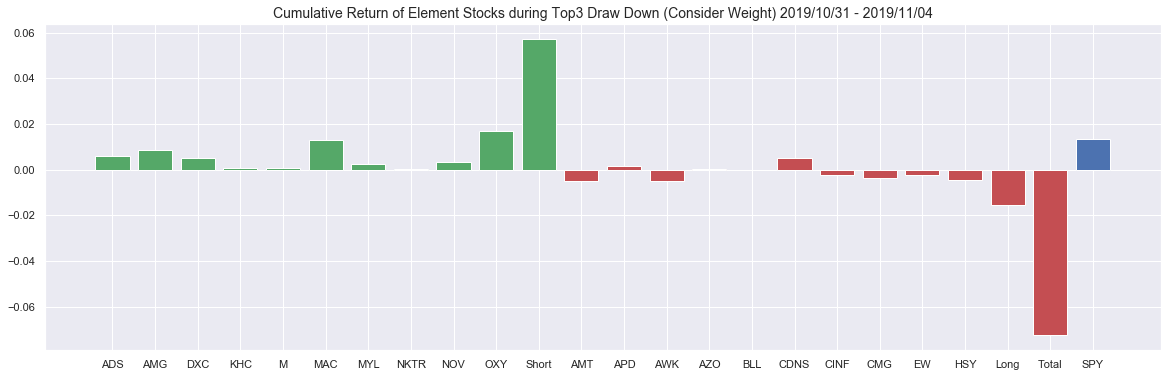

In [13]:
df = D[2].BT_df.copy()
df = df[(df.Date >= '2019-10-31') & (df.Date <= '2019-11-04')]
df = df.set_index('Date')

plt.figure(figsize=(20,6))
plt.title("Cumulative Return of Element Stocks during Top3 Draw Down (Consider Weight) 2019/10/31 - 2019/11/04",
         fontdict={'size': 14})

# Short
r_total = df[df.Ticker == Short[2][0]]['Return'].copy() * Short_Weight[2][0]
r_total[0] = 0.0
for i in range(10):
    r = df[df.Ticker == Short[2][i]]['Return'].copy()
    r[0] = 0.0
    r_cum = (r+1.0).cumprod() - 1.0
    Weight = Short_Weight[2][i]
    plt.bar(Short[2][i], height=r_cum[-1] * Weight, color = 'g')
    if i >= 1: 
        r_total += r * Weight
r_total = (r_total+1.0).cumprod() - 1.0
plt.bar('Short', height=r_total[-1], color = 'g')

# Long
r_total1 = df[df.Ticker == Long[2][0]]['Return'].copy() * Long_Weight[2][0]
r_total1[0] = 0.0
for i in range(10):
    r = df[df.Ticker == Long[2][i]]['Return'].copy()
    r[0] = 0.0
    r_cum = (r+1.0).cumprod() - 1.0
    Weight = Long_Weight[2][i]
    plt.bar(Long[2][i], height=r_cum[-1] * Weight, color = 'r')
    if i >= 1: 
        r_total1 += r * Weight
r_total1 = (r_total1+1.0).cumprod() - 1.0
plt.bar('Long', height=r_total1[-1], color = 'r')

# SPY
spy = df[df.Ticker == Long[2][i]]['SPY Return'].copy()
spy[0] = 0.0
spy = (spy+1.0).cumprod() - 1.0

total = (r_total1 * Long_Weight[2][-1] - r_total * Short_Weight[2][-1]) / (Long_Weight[2][-1] + Short_Weight[2][-1])
plt.bar('Total', height=r_total1[-1] - r_total[-1], color = 'r')
plt.bar('SPY', height=spy[-1], color = 'b')
plt.show()